# Classification Problem (Cylinders)

Make a copy of the data before mutating

Let's take a closer look at the data

In [43]:
data <- mtcars
?mtcars

mtcars                package:datasets                 R Documentation

_M_o_t_o_r _T_r_e_n_d _C_a_r _R_o_a_d _T_e_s_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     The data was extracted from the 1974 _Motor Trend_ US magazine,
     and comprises fuel consumption and 10 aspects of automobile design
     and performance for 32 automobiles (1973-74 models).

_U_s_a_g_e:

     mtcars
     
_F_o_r_m_a_t:

     A data frame with 32 observations on 11 variables.

       [, 1]  mpg   Miles/(US) gallon                        
       [, 2]  cyl   Number of cylinders                      
       [, 3]  disp  Displacement (cu.in.)                    
       [, 4]  hp    Gross horsepower                         
       [, 5]  drat  Rear axle ratio                          
       [, 6]  wt    Weight (1000 lbs)                        
       [, 7]  qsec  1/4 mile time                            
       [, 8]  vs    V/S                                      
       [, 9]  am    Transmission (0 = automatic, 1 = manual) 
       [,10]  gear  Number of forward gears                  
       [,11]  carb  Number of carburetors                    
      
_S_o_u_r_c_e:

     Henderson and Velleman (1981), Building multiple regression models
     interactively.  _Biometrics_, *37*, 391-411.

_E_x_a_m_p_l_e_s:

     require(graphics)
     pairs(mtcars, main = "mtcars data")
     coplot(mpg ~ disp | as.factor(cyl), data = mtcars,
            panel = panel.smooth, rows = 1)

### Make factors
We want to use factors when possible (discrete values)

In [44]:
data$vs <- factor(as.integer(data$vs), levels = c(0, 1), labels = c('straight', 'v'))
data$am <- factor(as.integer(data$am), levels = c(0, 1), labels = c('automatic', 'manual'))
data$gear <- factor(as.integer(data$gear), levels = 3:5, labels = c('three','four','five'))
data$carb <- factor(as.integer(data$carb), levels = 1:8, labels = c('one', 'two', 'three','four','five','six','seven','eight'))

data$cyl <- factor(as.integer(data$cyl), levels = c(4,6,8), labels = c('Four Cyl.', 'Six Cyl.', 'Eight Cyl.'))
summary(data$cyl)

Four Cyl.   Six Cyl. Eight Cyl. 
        11          7         14

### Split the test and train data
This time no set.seed() call, so random. Rerun notebook to see different results.

In [45]:
library(caret)
index.train <- createDataPartition(data$cyl, p = 0.7, list = FALSE)
train = data[index.train,]
test  = data[-(index.train), ]

### Train
We will use a tuning grid to find the best model and best hyperparameters

In [46]:
tg <- data.frame(.decay = 30:50/40)
tg
model <- train(cyl ~ .,
               data = train,
               method = "multinom",
               tuneGrid = tg,
               trace = FALSE)

,.decay
1,0.75
2,0.775
3,0.8
4,0.825
5,0.85
6,0.875
7,0.9
8,0.925
9,0.95
10,0.975


### View Model

Note the line "was used to select the best..." because of the tuning grid

In [47]:
model
summary(model)

Penalized Multinomial Regression 

23 samples
10 predictors
 3 classes: 'Four Cyl.', 'Six Cyl.', 'Eight Cyl.' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 23, 23, 23, 23, 23, 23, ... 
Resampling results across tuning parameters:

  decay  Accuracy   Kappa    
  0.750  0.8871746  0.8240288
  0.775  0.8871746  0.8240288
  0.800  0.8871746  0.8240288
  0.825  0.8871746  0.8240288
  0.850  0.8871746  0.8240288
  0.875  0.8871746  0.8240288
  0.900  0.8871746  0.8240288
  0.925  0.8871746  0.8240288
  0.950  0.8871746  0.8240288
  0.975  0.8871746  0.8240288
  1.000  0.8871746  0.8240288
  1.025  0.8871746  0.8240288
  1.050  0.8871746  0.8240288
  1.075  0.8871746  0.8240288
  1.100  0.8871746  0.8240288
  1.125  0.8871746  0.8240288
  1.150  0.8871746  0.8240288
  1.175  0.8871746  0.8240288
  1.200  0.8871746  0.8240288
  1.225  0.8871746  0.8240288
  1.250  0.8871746  0.8240288

Accuracy was used to select the optimal model using  the largest value.
T

Warning message:
In sqrt(diag(vc)): NaNs produced

Call:
multinom(formula = .outcome ~ ., data = dat, decay = param$decay, 
    trace = FALSE)

Coefficients:
            (Intercept)        mpg       disp        hp        drat          wt
Six Cyl.   -0.004996058 -0.1786795 0.06409957 0.0234549 -0.04289005 -0.04864684
Eight Cyl. -0.025581946 -0.7059028 0.09173488 0.0581029 -0.08384403 -0.03932014
                 qsec         vsv    ammanual     gearfour    gearfive
Six Cyl.   -0.4203935 -0.08552364  0.07432044 -0.017957776  0.04163829
Eight Cyl. -0.5408899 -0.06303891 -0.03127297 -0.003876452 -0.02740478
               carbtwo   carbthree     carbfour carbfive     carbsix carbseven
Six Cyl.   -0.12176928 -0.05419776  0.107383105        0  0.04166082         0
Eight Cyl.  0.01419818  0.05420465 -0.003642792        0 -0.02742210         0
               carbeight
Six Cyl.   -2.252735e-05
Eight Cyl.  1.732578e-05

Std. Errors:
           (Intercept)      mpg      disp        hp     drat       wt     qsec
Six Cyl.      1.449726 1.964157 0.1

### Predict

In [48]:
test$predicted <- predict(model, test)

### View Results

In [49]:
test[, c('cyl', 'predicted')]

,cyl,predicted
Hornet Sportabout,Eight Cyl.,Eight Cyl.
Merc 280,Six Cyl.,Six Cyl.
Merc 280C,Six Cyl.,Six Cyl.
Cadillac Fleetwood,Eight Cyl.,Eight Cyl.
Honda Civic,Four Cyl.,Four Cyl.
Dodge Challenger,Eight Cyl.,Eight Cyl.
Porsche 914-2,Four Cyl.,Four Cyl.
Lotus Europa,Four Cyl.,Four Cyl.
Ford Pantera L,Eight Cyl.,Eight Cyl.


### Confusion Matrix

In [50]:
cm <- confusionMatrix(test$predicted, test$cyl)
cm

Confusion Matrix and Statistics

            Reference
Prediction   Four Cyl. Six Cyl. Eight Cyl.
  Four Cyl.          3        0          0
  Six Cyl.           0        2          0
  Eight Cyl.         0        0          4

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.6637, 1)
    No Information Rate : 0.4444     
    P-Value [Acc > NIR] : 0.0006766  
                                     
                  Kappa : 1          
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Four Cyl. Class: Six Cyl. Class: Eight Cyl.
Sensitivity                    1.0000          1.0000            1.0000
Specificity                    1.0000          1.0000            1.0000
Pos Pred Value                 1.0000          1.0000            1.0000
Neg Pred Value                 1.0000          1.0000            1.0000
Prevalence                     0.3333          0.2222            0

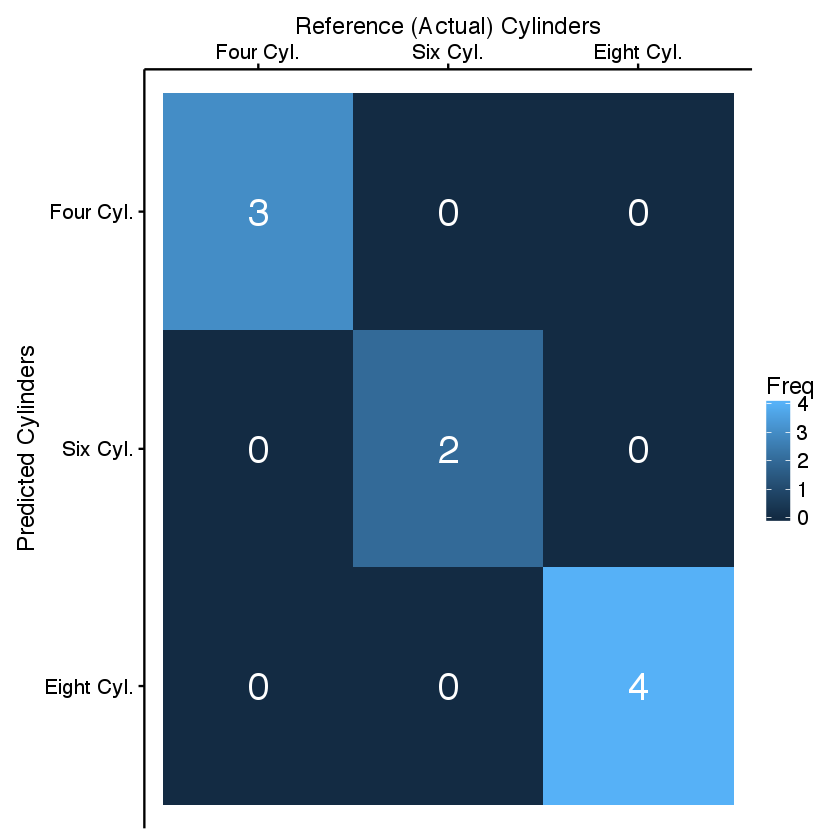

In [56]:
library(cowplot) # for ggdraw call

cmf <- as.data.frame(cm$table)
cmg <- ggplot(cmf) + 
  geom_tile(aes(x=Prediction, y=Reference, fill=Freq)) + 
  scale_x_discrete(name="Reference (Actual) Cylinders") + 
  scale_y_discrete(name="Predicted Cylinders", limits = rev(levels(cmf$Prediction))) +
  geom_text(aes(x = Prediction, y = Reference, label = Freq), color = "white", size = 8)
ggdraw(switch_axis_position(cmg, axis = 'x'))